In [84]:
import pandas as pd
import ast
import matplotlib.pyplot as plt
import seaborn as sns
import os
import cv2
import torch
import glob

In [71]:
model_ball_detection = torch.hub.load("./YOLOv5/yolov5/", source="local",model="custom", path="./YOLOV5/ball_detection_kaggle.pt")

YOLOv5  2022-10-9 Python-3.8.8 torch-1.11.0+cpu CPU

Fusing layers... 
YOLOv5s summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


In [226]:
frame_lst = glob.glob("../Dataset/Test Frame/*.jpg")

In [227]:
sorted_lst = []
for i in range(len(frame_lst)):
    sorted_lst.append(str(i+1) + ".jpg")

In [228]:
res_lst = []

In [229]:
for i in sorted_lst:
    path = "../Dataset/Test Frame/" + i
    
    pred = model_ball_detection(path)
    try:
        best_ball = pred.pandas().xyxy[0].sort_values(by="confidence", ascending=False).iloc[0, :]
        if (best_ball["confidence"] > 0.2):
            temp_dict = {"xmin": best_ball["xmin"],
                         "ymin": best_ball["ymin"],
                         "xmax": best_ball["xmax"],
                         "ymax": best_ball["ymax"],
                          "conf": best_ball["confidence"]}
            res_lst.append(temp_dict)
    except:
        pass
    

In [225]:
vid_path = "../Dataset/test.mp4"
vidcap = cv2.VideoCapture(vid_path)

count = 1
while(True):
    res, frame = vidcap.read()
    
    if res is False:
        break
    
    predictions = model_ball_detection(frame)
    #print(predictions.pandas().xyxy)
    
    cv2.imwrite("../Dataset/Test Frame/" + str(count) + ".jpg", frame)
    count += 1

In [10]:
df = pd.read_excel("../Dataset/Ball Coordinates Data.xlsx")

In [43]:
def corrParse(val):
    return val.lower()
    if val == "Right":
        return "Right handed"
    if val == "Left":
        return "Left handed"
    else:
        return val
    

In [45]:
df["Pred Batting Style"] = df["Pred Batting Style"].map(corrParse)

In [47]:
df_selected = df[df["Batting Style"] == df["Pred Batting Style"]].reset_index(drop=True)

In [124]:
df_selected[df_selected["Video Title"] != "8qXVwlm9eGQ"]

,Unnamed: 0,Video Title,Start,End,Batting Style,Pred Batting Style,Shot Style,Ball Coordinates
13,13,AghhkPjJpVQ,104,107,right handed,right handed,Leg,"[{'xmin': 547.8274536132812, 'ymin': 397.96966..."
14,16,AghhkPjJpVQ,155,158,right handed,right handed,Off,"[{'xmin': 568.2923583984375, 'ymin': 412.03125..."
15,17,AghhkPjJpVQ,189,192,right handed,right handed,Leg,"[{'xmin': 560.1232299804688, 'ymin': 348.97619..."
16,18,AghhkPjJpVQ,203,207,right handed,right handed,Off,"[{'xmin': 585.1495361328125, 'ymin': 412.24835..."
17,19,AghhkPjJpVQ,249,252,left handed,left handed,Leg,"[{'xmin': 548.4791259765625, 'ymin': 430.68884..."
18,20,AghhkPjJpVQ,382,384,left handed,left handed,Off,"[{'xmin': 618.7316284179688, 'ymin': 490.05041..."
19,21,AghhkPjJpVQ,42,45,right handed,right handed,Off,"[{'xmin': 556.8951416015625, 'ymin': 417.86795..."
20,22,AghhkPjJpVQ,445,447,left handed,left handed,Off,"[{'xmin': 549.7885131835938, 'ymin': 366.80429..."
21,23,AghhkPjJpVQ,451,453,left handed,left handed,Leg,"[{'xmin': 550.9760131835938, 'ymin': 353.59225..."
22,24,AghhkPjJpVQ,463,466,left handed,left handed,Off,"[{'xmin': 536.83642578125, 'ymin': 382.2825927..."


In [66]:
ast.literal_eval(df_selected["Ball Coordinates"].values[0])

[{'xmin': 498.85540771484375,
  'ymin': 360.6977844238281,
  'xmax': 508.01641845703125,
  'ymax': 369.2376403808594,
  'conf': 0.3497830629348755},
 {'xmin': 432.2132263183594,
  'ymin': 0.0,
  'xmax': 443.3731384277344,
  'ymax': 7.092296600341797,
  'conf': 0.3716580867767334},
 {'xmin': 493.4952087402344,
  'ymin': 338.4705810546875,
  'xmax': 502.5731506347656,
  'ymax': 346.82501220703125,
  'conf': 0.6918177604675293},
 {'xmin': 496.6406555175781,
  'ymin': 320.06890869140625,
  'xmax': 506.6575622558594,
  'ymax': 329.44561767578125,
  'conf': 0.6968801617622375},
 {'xmin': 492.49676513671875,
  'ymin': 350.1211853027344,
  'xmax': 505.56878662109375,
  'ymax': 363.1430358886719,
  'conf': 0.7582313418388367},
 {'xmin': 491.35406494140625,
  'ymin': 304.1645202636719,
  'xmax': 503.95098876953125,
  'ymax': 315.5655212402344,
  'conf': 0.6474828124046326},
 {'xmin': 490.1725158691406,
  'ymin': 309.08819580078125,
  'xmax': 501.8724670410156,
  'ymax': 319.712646484375,
  'conf

In [230]:
x_lst = []
y_lst = []

lst = ast.literal_eval(df_selected["Ball Coordinates"].values[0])

penalty = 0
for elem in res_lst:
    x_lst.append(elem["xmax"])
    y_lst.append(elem["ymax"] + penalty)
    penalty += 100
    

In [209]:
res_lst

[{'xmin': 537.5572509765625,
  'ymin': 298.8610534667969,
  'xmax': 545.55859375,
  'ymax': 305.6211242675781,
  'conf': 0.6112751364707947},
 {'xmin': 531.2720947265625,
  'ymin': 312.212890625,
  'xmax': 540.3189697265625,
  'ymax': 319.8680419921875,
  'conf': 0.7333609461784363},
 {'xmin': 531.2863159179688,
  'ymin': 312.2218322753906,
  'xmax': 540.3102416992188,
  'ymax': 319.8512268066406,
  'conf': 0.730582058429718},
 {'xmin': 550.9539794921875,
  'ymin': 320.3704528808594,
  'xmax': 559.036865234375,
  'ymax': 328.5410461425781,
  'conf': 0.6655860543251038},
 {'xmin': 557.4022216796875,
  'ymin': 305.54803466796875,
  'xmax': 565.5572509765625,
  'ymax': 312.68206787109375,
  'conf': 0.3396585285663605},
 {'xmin': 557.4004516601562,
  'ymin': 305.5260009765625,
  'xmax': 565.5612182617188,
  'ymax': 312.66387939453125,
  'conf': 0.34232255816459656},
 {'xmin': 560.6163330078125,
  'ymin': 290.3587646484375,
  'xmax': 569.4805908203125,
  'ymax': 298.59423828125,
  'conf': 0

In [231]:
x1 = x_lst[0]
y1 = y_lst[0]

x2 = x_lst[-1]
y2 = y_lst[-1]

slope = ((y2-y1) / (x2-x1))
print(slope)

if slope < 0:
    print("Off side")
else:
    print("Leg side")

14.991272255771564
Leg side


In [208]:
x_lst[-2]

86.55570983886719

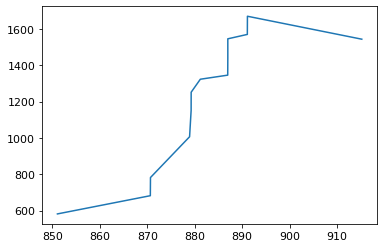

In [232]:
plt.plot(x_lst, y_lst)

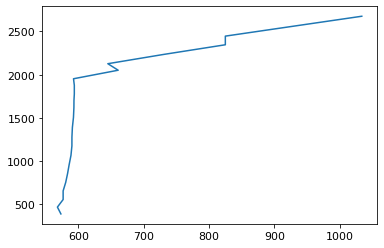

In [141]:
plt.plot(x_lst, y_lst)

In [ ]:
"C:\Users\Assus\Cricket NLP\Cricket NLP Version 1.1\Dataset\Frames_1.1\"

In [222]:
img = "../Dataset/Frames_1.1/AghhkPjJpVQ_42_45_24.jpg"

In [223]:
i = cv2.imread(img)

In [224]:
i.shape

(720, 1280, 3)